## Tiltmeter - Plot Events

### Import Libraries

In [1]:
import os
import obspy
import matplotlib.pyplot as plt
import pandas as pd

from numpy import arange, linspace, sqrt, diff, nan, gradient, nan
from pandas import read_csv, DataFrame
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.ma import filled, isMaskedArray, masked
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from obspy import UTCDateTime
from pathlib import Path

from andbro__querrySeismoData import __querrySeismoData
from andbro__get_seconds import __get_seconds
from andbro__readYaml import __readYaml
from andbro__get_timeaxis import __get_timeaxis

### Define Functions

In [2]:
def __makeplot(pt, bt, config):
    
    fig, axes = plt.subplots(3,2, figsize=(15,5), sharex=True)
    
    for i in range(3):
        
        axes[i,0].plot(pt[i].times()/60, pt[i].data)
        axes[i,1].plot(bt[i].times()/60, bt[i].data)
        
        axes[i,0].grid()
        axes[i,1].grid()
        
    axes[2,0].set_xlabel("Time (min)")
    axes[2,1].set_xlabel("Time (min)")
    
    axes[0,0].set_ylabel("$\Omega$ (rad)")
    axes[1,0].set_ylabel("$\Omega$ (rad)")
    axes[2,0].set_ylabel("Temp (°C)")
    
    axes[0,1].set_ylabel("$\Omega$ (rad)")
    axes[1,1].set_ylabel("$\Omega$ (rad)")
    axes[2,1].set_ylabel("Temp (°C)")
    
    return fig 

### Configurations

In [3]:
## configurations
config={}

path = "/home/andbro/Desktop/tiltmeter/"

config['save'] = True

config['seed_id'] = ["BW.TROMY..MA*", "BW.DROMY..LA*",
                     "BW.ROMY.20.BJZ", "BW.ROMY.20.BJN", "BW.ROMY.20.BJE",
                     "BW.ROMY.10.BJZ",
                     "BW.RLAS..BJZ"]

config['repository'] = 'george'
config['datapath'] =  None
config['name'] = 'tiltmeter'
config['set_filter'] = 'n'


## tiltmeter configurations
confTilt = __readYaml('/home/brotzer/Documents/ROMY/','tiltmeter.conf')
confPT = confTilt['PT']
confBT = confTilt['BT']


In [4]:
## Alaska 8.2
config['tbeg'] = UTCDateTime("2021-07-29 05:13")
config['tend'] = UTCDateTime("2021-07-29 10:00")

## Peri 7.5
config['tbeg'] = UTCDateTime("2021-11-28 10:52")
config['tend'] = UTCDateTime("2021-11-28 11:15")


## Peri 7.5
config['tbeg'] = UTCDateTime("2022-05-20 12:35")
config['tend'] = UTCDateTime("2022-05-20 13:00")

## gain for Temperature channel of PT was not set correctly prior to 2021-03-03
correct_settings_temp_PT = ("2021-03-05", config['tend'])

### Load Tiltmeter Data

In [5]:
st = obspy.Stream()
for i in range(len(config['seed_id'])):
    
    try:
        st0, inv0 = __querrySeismoData(    
                                    seed_id=config.get("seed_id")[i],
                                    starttime=config.get("tbeg"),
                                    endtime=config.get("tend"),
                                    repository=config.get("repository"),
                                    path=config.get("datapath"),
                                    restitute=True,
                                    detail=None,
                                    fill_value=-9999, 
                                    )

        st += st0

    except: 
        print(f"failed for {config['seed_id'][i]}")
st

/home/brotzer/anaconda3/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1.2, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))
/home/brotzer/anaconda3/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1.2, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))
/home/brotzer/anaconda3/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1.2, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))
/home/brotzer/anaconda3/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1.2, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))
/home/brotzer/anaconda3/lib/python3.7/site-packages/obspy/io/sta

11 Trace(s) in Stream:
BW.TROMY..MAE  | 2022-05-20T12:35:00.039999Z - 2022-05-20T13:00:00.039999Z | 5.0 Hz, 7501 samples
BW.TROMY..MAN  | 2022-05-20T12:35:00.040000Z - 2022-05-20T13:00:00.040000Z | 5.0 Hz, 7501 samples
BW.TROMY..MAT  | 2022-05-20T12:35:00.040000Z - 2022-05-20T13:00:00.040000Z | 5.0 Hz, 7501 samples
BW.DROMY..LAE  | 2022-05-20T12:35:00.000000Z - 2022-05-20T13:00:00.000000Z | 1.0 Hz, 1501 samples
BW.DROMY..LAN  | 2022-05-20T12:35:00.000000Z - 2022-05-20T13:00:00.000000Z | 1.0 Hz, 1501 samples
BW.DROMY..LAT  | 2022-05-20T12:35:00.000000Z - 2022-05-20T13:00:00.000000Z | 1.0 Hz, 1501 samples
BW.ROMY.20.BJZ | 2022-05-20T12:35:00.000000Z - 2022-05-20T13:00:00.000000Z | 20.0 Hz, 30001 samples
BW.ROMY.20.BJN | 2022-05-20T12:35:00.000000Z - 2022-05-20T13:00:00.000000Z | 20.0 Hz, 30001 samples
BW.ROMY.20.BJE | 2022-05-20T12:35:00.000000Z - 2022-05-20T13:00:00.000000Z | 20.0 Hz, 30001 samples
BW.ROMY.10.BJZ | 2022-05-20T12:34:59.975800Z - 2022-05-20T12:59:59.975800Z | 20.0 Hz, 300

### Covert Tiltmeter Data

In [6]:
def __conversion(st, confBT, confPT):

    def convertTemp(trace, gain):
        Tvolt = trace.data * gain
        return 10.18 - 11.59*Tvolt + 0.3335*Tvolt**2 - 0.5316*Tvolt**3

    def convertTilt(trace, conversion, sensitivity):
        return trace.data * conversion * sensitivity
        # print( type(conversion), type(sensitivity), type(trace.data) )

    for tr in st:
        if tr.stats.channel == 'MAT':
            tr.data = convertTemp(tr, confPT['gainTemp'])
        elif tr.stats.channel == 'MAN':
            tr.data = convertTilt(tr, confPT['convPTN'], confPT['gainTilt'])
        elif tr.stats.channel == 'MAE':
            tr.data = convertTilt(tr, confPT['convPTE'], confPT['gainTilt'])

        elif tr.stats.channel == 'LAT':
            tr.data = convertTemp(tr, confBT['gainTemp'])
        elif tr.stats.channel == 'LAN':
            tr.data = convertTilt(tr, confBT['convBTN'], confBT['gainTilt'])
        elif tr.stats.channel == 'LAE':
            tr.data = convertTilt(tr, confBT['convBTE'], confBT['gainTilt'])

    print("  -> converted data")
    return st

In [7]:
st.select(channel="MAN")

1 Trace(s) in Stream:
BW.TROMY..MAN | 2022-05-20T12:35:00.040000Z - 2022-05-20T13:00:00.040000Z | 5.0 Hz, 7501 samples

In [8]:
pt = __conversion(st.select(channel="MA*"), confBT, confPT)

bt = __conversion(st.select(channel="LA*"), confBT, confPT)

  -> converted data
  -> converted data


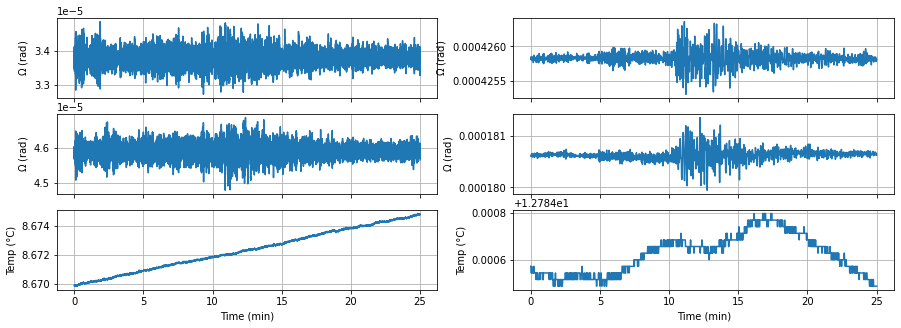

In [9]:
fig = __makeplot(pt, bt, config);

In [16]:
for tr in st:
    if tr.stats.channel in ["LAT", "MAT"]:  
        st.remove(tr)

st = st.resample(1.0)        
        
st = st.detrend('linear')

st = st.filter('bandpass', freqmin=0.01, freqmax=0.1, corners=4, zerophase=True)
    
# st.plot(equal_scale=False)

10 Trace(s) in Stream:
BW.TROMY..MAE  | 2022-05-20T12:35:00.039999Z - 2022-05-20T13:00:00.039999Z | 5.0 Hz, 7501 samples
BW.TROMY..MAN  | 2022-05-20T12:35:00.040000Z - 2022-05-20T13:00:00.040000Z | 5.0 Hz, 7501 samples
BW.DROMY..LAE  | 2022-05-20T12:35:00.000000Z - 2022-05-20T13:00:00.000000Z | 1.0 Hz, 1501 samples
BW.DROMY..LAN  | 2022-05-20T12:35:00.000000Z - 2022-05-20T13:00:00.000000Z | 1.0 Hz, 1501 samples
BW.DROMY..LAT  | 2022-05-20T12:35:00.000000Z - 2022-05-20T13:00:00.000000Z | 1.0 Hz, 1501 samples
BW.ROMY.20.BJZ | 2022-05-20T12:35:00.000000Z - 2022-05-20T13:00:00.000000Z | 20.0 Hz, 30001 samples
BW.ROMY.20.BJN | 2022-05-20T12:35:00.000000Z - 2022-05-20T13:00:00.000000Z | 20.0 Hz, 30001 samples
BW.ROMY.20.BJE | 2022-05-20T12:35:00.000000Z - 2022-05-20T13:00:00.000000Z | 20.0 Hz, 30001 samples
BW.ROMY.10.BJZ | 2022-05-20T12:34:59.975800Z - 2022-05-20T12:59:59.975800Z | 20.0 Hz, 30001 samples
BW.RLAS..BJZ   | 2022-05-20T12:34:59.975750Z - 2022-05-20T12:59:59.975750Z | 20.0 Hz, 3

9 Trace(s) in Stream:
BW.TROMY..MAE  | 2022-05-20T12:35:00.039999Z - 2022-05-20T13:00:00.039999Z | 5.0 Hz, 7501 samples
BW.TROMY..MAN  | 2022-05-20T12:35:00.040000Z - 2022-05-20T13:00:00.040000Z | 5.0 Hz, 7501 samples
BW.DROMY..LAE  | 2022-05-20T12:35:00.000000Z - 2022-05-20T13:00:00.000000Z | 1.0 Hz, 1501 samples
BW.DROMY..LAN  | 2022-05-20T12:35:00.000000Z - 2022-05-20T13:00:00.000000Z | 1.0 Hz, 1501 samples
BW.ROMY.20.BJZ | 2022-05-20T12:35:00.000000Z - 2022-05-20T13:00:00.000000Z | 20.0 Hz, 30001 samples
BW.ROMY.20.BJN | 2022-05-20T12:35:00.000000Z - 2022-05-20T13:00:00.000000Z | 20.0 Hz, 30001 samples
BW.ROMY.20.BJE | 2022-05-20T12:35:00.000000Z - 2022-05-20T13:00:00.000000Z | 20.0 Hz, 30001 samples
BW.ROMY.10.BJZ | 2022-05-20T12:34:59.975800Z - 2022-05-20T12:59:59.975800Z | 20.0 Hz, 30001 samples
BW.RLAS..BJZ   | 2022-05-20T12:34:59.975750Z - 2022-05-20T12:59:59.975750Z | 20.0 Hz, 30001 samples

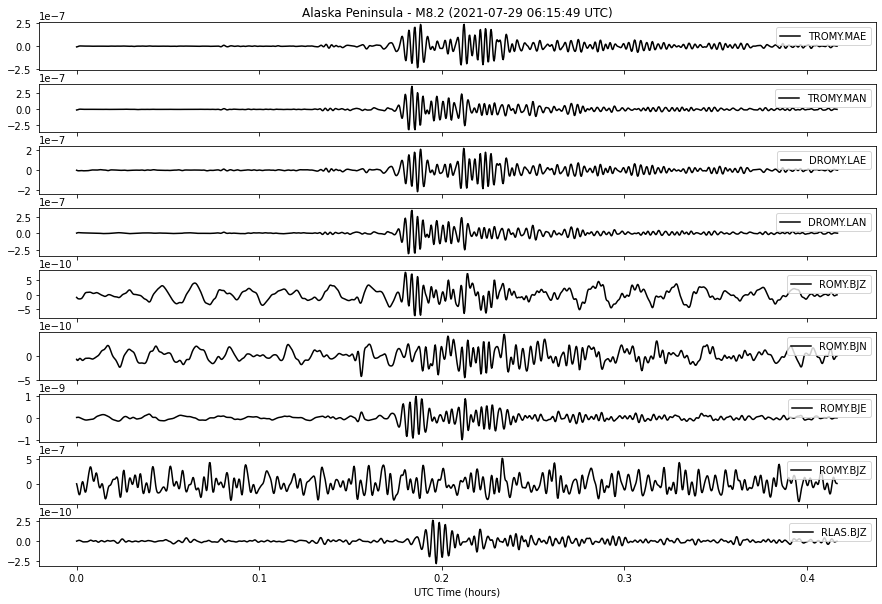

In [17]:
N = len(st)
fig, ax = plt.subplots(N, 1, figsize=(15,10), sharex=True)

plt.subplots_adjust(hspace=0.3)

for i, tr in enumerate(st):
    
    ax[i].plot((tr.times("matplotlib") - tr.times("matplotlib")[0])*24, tr.data, 'k', label=f"{tr.stats.station}.{tr.stats.channel}")
    ax[i].legend(loc="upper right")
    
ax[0].set_title("Alaska Peninsula - M8.2 (2021-07-29 06:15:49 UTC)")
ax[N-1].set_xlabel("UTC Time (hours)")    
    
plt.show();